In [ ]:
%pip install matplotlib seaborn
%pip install scipy

In [ ]:
# Imports necesarios para el notebook
from random import seed

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

from util import time_algorithm
from primera_parte import algoritmo_greedy
from collections import deque

# Siempre seteamos la seed de aleatoridad para que los # resultados sean reproducibles
seed(12345)
np.random.seed(12345)

sns.set_theme()


# Conjunto de datos variando la cantidad de monedas

## Primera medicion

Creamos 20 arreglos que van a tener monedas de valores de 0 a 1000, los cuales variaremos su longitud, que iran desde 100 a 100000 (cada longitud equidistanciados igualmente)

In [102]:
def get_random_array(size: int):
    return deque(np.random.randint(0, 1000, size))

# La variable x van a ser los valores del eje x de los gráficos en todo el notebook
# Tamaño mínimo=100, tamaño máximo=10kk, cantidad de puntos=20
x = np.linspace(100, 100_000, 20).astype(int)

results = time_algorithm(algoritmo_greedy, x, lambda s: [get_random_array(s)])

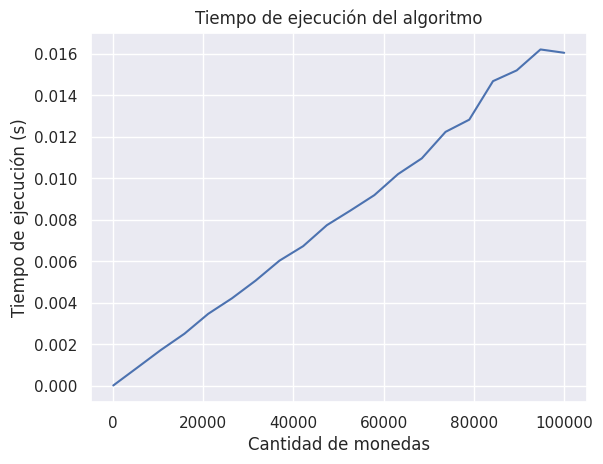

In [ ]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución del algoritmo')
ax.set_xlabel('Cantidad de monedas')
ax.set_ylabel('Tiempo de ejecución (s)')
None

Vamos entonces a calcular el ajuste por cuadrados mínimos a traves de la biblioteca scipy:

c_1 = 1.6740941699905137e-07, c_2 = -0.00015600840857384507
Error cuadrático total: 1.7199735949195336e-06


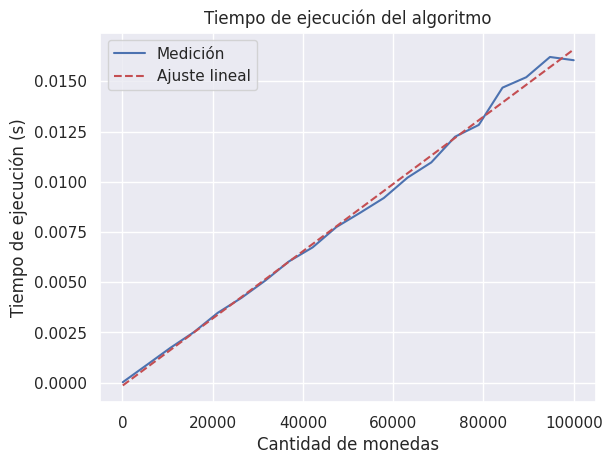

In [104]:
# Scipy nos pide una función que recibe primero x y luego los parámetros a ajustar:
f = lambda x, c1, c2: c1 * x + c2

c, pcov = sp.optimize.curve_fit(f, x, [results[n] for n in x])

print(f"c_1 = {c[0]}, c_2 = {c[1]}")
r = np.sum((c[0] * x + c[1] - [results[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

# Graficamos el ajuste
ax.plot(x, [c[0] * n + c[1] for n in x], 'r--', label="Ajuste lineal")
ax.legend()
fig


Y por ultimo, el error que se comete por cada cantidad de monedas.

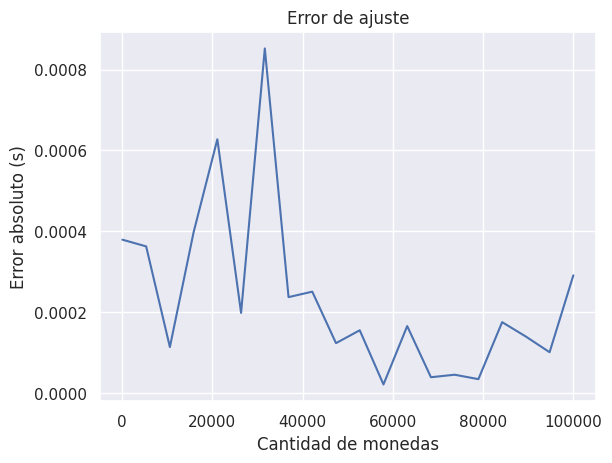

In [115]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n + c[1] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Cantidad de monedas')
ax.set_ylabel('Error absoluto (s)')
None

## Segunda medicion

Repetiremos los mismos pasos que la primera medicion, pero ahora con valores de monedas que van desde el 100000000 hasta 200000000.

In [116]:
def get_random_array(size: int):
    return deque(np.random.randint(100000000, 200000000, size))

# La variable x van a ser los valores del eje x de los gráficos en todo el notebook
# Tamaño mínimo=100, tamaño máximo=10kk, cantidad de puntos=20
x = np.linspace(100, 100_000, 20).astype(int)

results = time_algorithm(algoritmo_greedy, x, lambda s: [get_random_array(s)])

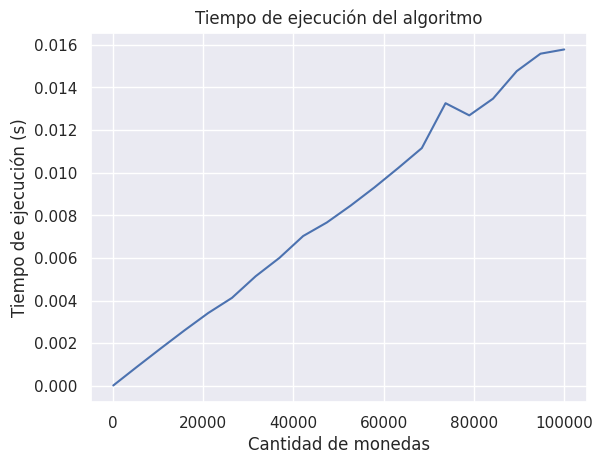

In [117]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución del algoritmo')
ax.set_xlabel('Cantidad de monedas')
ax.set_ylabel('Tiempo de ejecución (s)')
None

c_1 = 1.6302529289059643e-07, c_2 = 9.276509612327307e-06
Error cuadrático total: 2.0717641368124945e-06


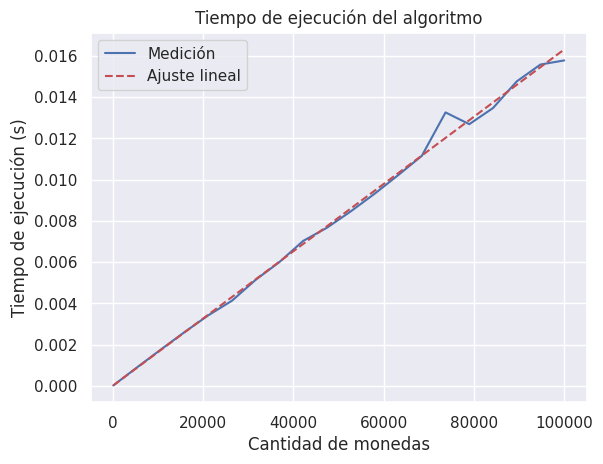

In [118]:
# Scipy nos pide una función que recibe primero x y luego los parámetros a ajustar:
f = lambda x, c1, c2: c1 * x + c2

c, pcov = sp.optimize.curve_fit(f, x, [results[n] for n in x])

print(f"c_1 = {c[0]}, c_2 = {c[1]}")
r = np.sum((c[0] * x + c[1] - [results[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

# Graficamos el ajuste
ax.plot(x, [c[0] * n + c[1] for n in x], 'r--', label="Ajuste lineal")
ax.legend()
fig


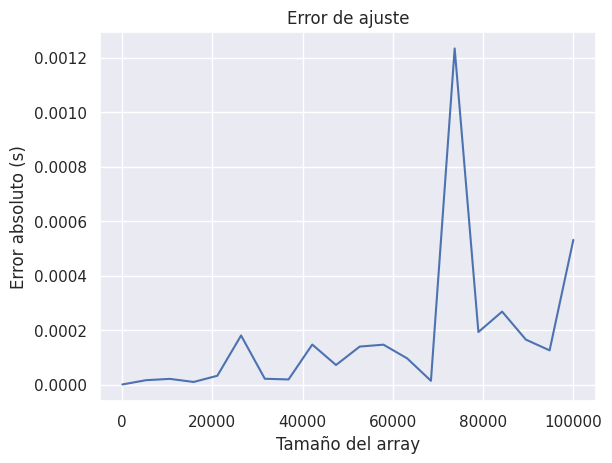

In [121]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n + c[1] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None